# Project: Investigate a Dataset - [No-Show Medical Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No-Show Medical Appointments dataset contains information from 110,527 medical appointments made by 62,299 patients in Brazilian healthcare facilities. Due to confidentiality requirements, the dataset only includes anonymous patient information. <br>
The columns include information on the following features:
* PatientID, Appointment ID: Anonymous identifiers for patients and their scheduled appointments.
* ScheduledDay, AppointmentDay: The time patients scheduled their appointment, and their prospective appointment days.
* Gender, Age and Neighbourhood: Descriptive characteristics of the sex, age, and residence of patients.
* Hipertension, Diabetes, Alcoholism, Handcap: Basic information on patients' health status detailing whether or not they are hypertensive, diabetic, alcoholic, or handicapped.
* Scholarship: Information on whether the patient's healthcare service is covered by the [Brazilian Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) social welfare program.
* SMS_received: A Boolean indicating whether or not an SMS reminder was sent to the patient ahead of their appointment.


### Questions for Analysis
The questions to be explored in this analysis include:

* What are the most significant features among patients who miss their appointments?
* What percentage of alcoholic vs non alcoholic, hypertensive vs non hypertensive, and diabetic vs non diabetic patients are more likely to miss their appointments? 
* What effect does a healthcare scholarship or SMS reminder have on the chance of a patient showing up for their medical appointment?


In [19]:
# Importing the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data and view its general properties. I will check cleanliness, then clean it as needed in preparation for analysis.


### General Properties

In [20]:
# Loading in the dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [21]:
# Viewing the first few rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
# Retrieving an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
# Checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [24]:
# Checking for duplicate data
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [25]:
# Retrieving summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> There are no null or duplicated values in the dataset.<br>
However, the column names are difficult to read and contain typographical errors, so I will be renaming them. The Handicap column has outlier values greater than 1 which need to be investigated. Judging from the percentiles, there are few occurrences of this outlier, so it may be an error.<br>

> The data contained in the ScheduledDay and AppointmentDay columns are strings instead of DateTime objects, so I will be converting them to the appropriate datatype. The  The PatientId column also has an inconvenient float datatype, but judging from its 25th percentile and maximum value which are in exponents of 12 to 14, the bulk of the numbers are extremely long. Working with them as integers would pose an even bigger challenge, so I will not be converting the floats to integers.

In [26]:
# Renaming the column heads for better readability
df= df.rename(columns = {"PatientId": "Patient_ID","AppointmentID":"Appointment_ID","ScheduledDay":"Scheduled_Day","AppointmentDay":"Appointment_Day","Hipertension":"Hypertension", "Handcap":"Handicap"})

# Viewing the renamed columns
df.columns

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No-show'],
      dtype='object')

In [27]:
df.query('Handicap > 1')

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [28]:
df["Handicap"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

> There are 199 occurrences of values between 2 and 4, so this is less likely to be an error.<br>
I returned to Kaggle to investigate the data collection process through the topic author. There, I found that the Handicap column is not a Boolean as earlier indicated, but an integer indicating the [number of disabilities the patient has](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356).

In [29]:
# Converting the appointment scheduling data to datetime objects
df["Scheduled_Day"] = pd.to_datetime(df["Scheduled_Day"])

In [30]:
# Converting the potential appointment times to datetime objects
df["Appointment_Day"] = pd.to_datetime(df["Appointment_Day"])

In [31]:
# Viewing the converted datatypes
df[["Scheduled_Day", "Appointment_Day"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Scheduled_Day    110527 non-null  datetime64[ns, UTC]
 1   Appointment_Day  110527 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.7 MB


In [32]:
# Viewing the converted DataFrame
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the popular features among patients who miss their appointments?)

In [33]:
# Creating a copy of the Dataframe without PatientID and AppointmentID
df = df.drop(columns = ["Patient_ID", "Appointment_ID"])

# Creating a mask for missed appointments
missed = df["No-show"] == "Yes"
not_missed = df["No-show"] == "No"

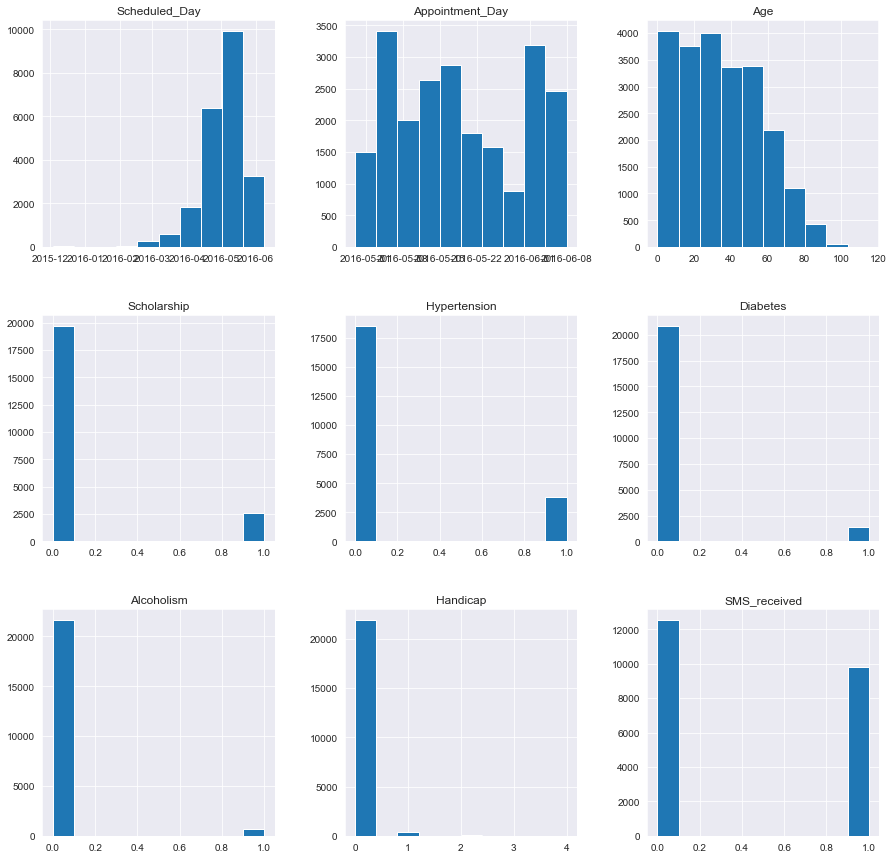

In [34]:
# Setting a seaborn style for better visualisation
sns.set_style("darkgrid")

# Visualising the distributions for missed appointments
df[missed].hist(figsize = (15, 15));

#### 1. Gender: Are males or females more likely to miss their appointments?

In [35]:
# Grouping the met and unmet appointments by gender

gender = df.groupby("Gender")["No-show"].value_counts()

Due to the wide disparity in count, using the proportions for each group will give a more accurate analysis.

In [36]:
# Visualising the proportions of male and female missed patient appointments
Female = gender["F"]["Yes"]/gender["F"].sum()
Male = gender["M"]["Yes"]/gender["M"].sum()

# Printing the results
print("Female: ", Female)
print("Male: ", Male)

Female:  0.20314587973273943
Male:  0.19967947889471915


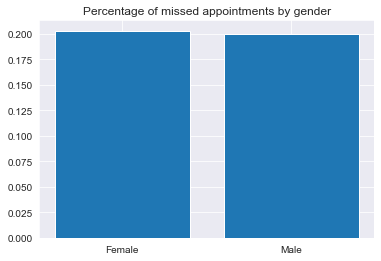

In [37]:
#Plotting the proportions
plt.bar([1, 2], [Female, Male])
plt.xticks([1, 2], ["Female", "Male"])
plt.title("Percentage of missed appointments by gender");

Gender does not seem to have a pronounced effect on the likelihood of missing appointments.

#### 2. Age: Do older or younger people miss more appointments?

From the histogram overview, it appears that more younger patients miss their appointments than older ones. However, I need to confirm that this is not due to a larger population of younger patients than older ones.

In [38]:
# Examining the median age of patients
df["Age"].median()

37.0

More patients seem to be younger, so a proportion count would give a less biased overview of the data. To do this, I'll cut the wide range of patient ages into classes, group them, then find a proportion for each.

In [39]:
# Cutting the age column into classes
groups = ["0 to 10", "11 to 20", "21 to 30","31 to 40","41 to 50", "51 to 60","61 to 70",\
          "71 to 80", "81 to 90","91 to 100", "101 to 110", "111 to 120"]
df["Age_Range"] = pd.cut(df["Age"], 12, labels=groups)

In [40]:
# Viewing the new changes
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_Range
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61 to 70
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,51 to 60
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61 to 70
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 to 10
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,51 to 60


In [41]:
# Viewing the counts for each age range
age_prop = df.groupby("Age_Range")["No-show"].value_counts()
age_prop

Age_Range   No-show
0 to 10     No         12984
            Yes         3120
11 to 20    No          9536
            Yes         3227
21 to 30    No         10397
            Yes         3444
31 to 40    No         10439
            Yes         2970
41 to 50    No         11352
            Yes         2971
51 to 60    No         12996
            Yes         2825
61 to 70    No         10277
            Yes         1875
71 to 80    No          6185
            Yes         1108
81 to 90    No          3295
            Yes          626
91 to 100   No           708
            Yes          146
101 to 110  No            37
            Yes            4
111 to 120  Yes            3
            No             2
Name: No-show, dtype: int64

In [42]:
# Defining a function to print the proportion for each age range
def prop(name):
    for name in groups:
        print ({name: age_prop[name]["Yes"]/age_prop[name].sum()})

In [43]:
#Examining the proportion for each age range
prop(age_prop)

{'0 to 10': 0.19374068554396423}
{'11 to 20': 0.25284024132257304}
{'21 to 30': 0.24882595188208945}
{'31 to 40': 0.22149302707136997}
{'41 to 50': 0.2074286113244432}
{'51 to 60': 0.17856014158397068}
{'61 to 70': 0.15429558920342332}
{'71 to 80': 0.15192650486768133}
{'81 to 90': 0.15965314970670746}
{'91 to 100': 0.17096018735362997}
{'101 to 110': 0.0975609756097561}
{'111 to 120': 0.6}


> These proportions show that the proportion of missed appointments decreases by age. It appears that indeed, younger people are generally more likely to miss their doctor's appointments! <br>
The exception to this trend is in the age range of 111 to 120, but the value counts shows that there are only 3 patients in this category, so the sample size for the outlier is hardly representative.

#### 3. Hypertension: Do hypertensive or  non-hypertensive patients miss more appointments?

In [44]:
# Grouping appointments by hypertension
hypertension = df.groupby("Hypertension")["No-show"].value_counts()

In [45]:
#Examining the proportions of met and unmet appointments depending on hypertension

Hypertensive= hypertension[1]["Yes"]/hypertension[1].sum()
Not_Hypertensive= hypertension[0]["Yes"]/hypertension[0].sum()

# Printing the results
print("Hypertensive: ", Hypertensive)
print("Not Hypertensive: ", Not_Hypertensive)

Hypertensive:  0.17301958625751113
Not Hypertensive:  0.20903680995424115


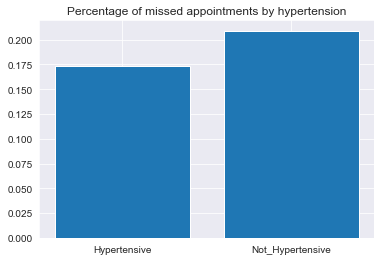

In [46]:
# Visualising the proportions

plt.bar([1, 2], [Hypertensive, Not_Hypertensive])
plt.xticks([1, 2], ["Hypertensive", "Not_Hypertensive"])
plt.title("Percentage of missed appointments by hypertension");

The proportion of non-hypertensive patients who do not show up for their appointments appears to be higher than that of hypertensive patients.

#### 4. Diabetes: Do diabetic or  non-diabetic patients miss more appointments?

In [47]:
# Grouping appointments by diabetes
diabetes = df.groupby("Diabetes")["No-show"].value_counts()

In [48]:
#Examining the proportions for greater accuracy
Diabetic= diabetes[1]["Yes"]/diabetes[1].sum()
Non_Diabetic = diabetes[0]["Yes"]/diabetes[0].sum()

# Printing the results
print("Diabetic: ", Diabetic)
print("Non-Diabetic: ", Non_Diabetic)

Diabetic:  0.18003273322422259
Non-Diabetic:  0.20362824612025268


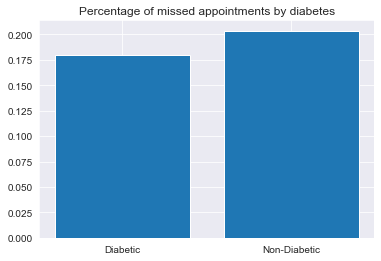

In [49]:
# Visualising the proportions

plt.bar([1, 2], [Diabetic, Non_Diabetic])
plt.xticks([1, 2], ["Diabetic", "Non-Diabetic"])
plt.title("Percentage of missed appointments by diabetes");

Diabetic patients seem slightly more likely to miss their appointments, but the difference is not very significant

#### 5. Alcoholism: Do alcoholic or  non-alcoholic patients miss more appointments?

In [50]:
# Grouping the frequency of met and unmet appointments by alcoholism
alcoholism = df.groupby("Alcoholism")["No-show"].value_counts()

In [51]:
#Examining the proportions for greater accuracy

Alcoholic = alcoholism[1]["Yes"]/alcoholism[1].sum()
Non_Alcoholic = alcoholism[0]["Yes"]/alcoholism[0].sum()

#Viewing the results
print("Alcoholic: ", Alcoholic)
print("Non-Alcoholic: ", Non_Alcoholic)

Alcoholic:  0.20148809523809524
Non-Alcoholic:  0.20194649472318904


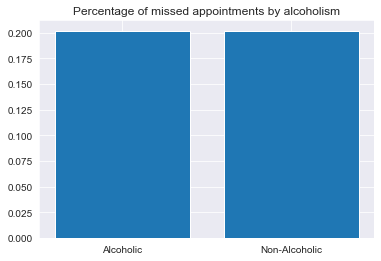

In [52]:
# Visualising the proportions

plt.bar([1, 2], [Alcoholic, Non_Alcoholic])
plt.xticks([1, 2], ["Alcoholic", "Non-Alcoholic"])
plt.title("Percentage of missed appointments by alcoholism");

There is no significant difference between the proportion of alcoholic or non-aloholic patients who miss their appointments.

#### Scholarship: Are patients without social welfare coverage more likely to miss appointments?

In [53]:
# Grouping the frequency of met and unmet appointments depending on social welfare coverage
scholarship = df.groupby("Scholarship")["No-show"].value_counts()

In [54]:
#Examining the proportions for accuracy
Scholarship = scholarship[1]["Yes"]/scholarship[1].sum()
No_Scholarship = scholarship[0]["Yes"]/scholarship[0].sum()

#Viewing the results
print("Scholarship: ", Scholarship)
print("No_Scholarship: ", No_Scholarship)

Scholarship:  0.2373630420771568
No_Scholarship:  0.19807155900708365


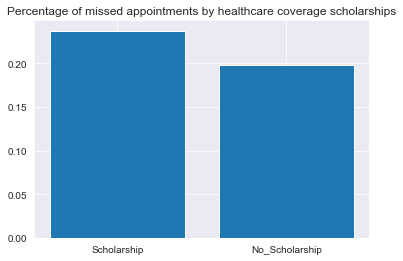

In [55]:
# Visualising the proportions

plt.bar([1, 2], [Scholarship, No_Scholarship])
plt.xticks([1, 2], ["Scholarship", "No_Scholarship"])
plt.title("Percentage of missed appointments by healthcare coverage scholarships");

Interestingly, patients with the Bolsa Familia healthcare coverage are even slightly more likely to miss their doctor's appointments!

#### Neighbourhood: Does the patient's residence affect their likelihood to miss appointments?

In [56]:
# Retrieving the number of values
df["Neighbourhood"].nunique()

81

In [57]:
# Estimating the frequency of missed appointments by neighborhood
neighbourhood = df.groupby("Neighbourhood")["No-show"].value_counts().sort_values(ascending = False)
neighbourhood.head(10)

Neighbourhood    No-show
JARDIM CAMBURI   No         6252
MARIA ORTIZ      No         4586
RESISTÊNCIA      No         3525
JARDIM DA PENHA  No         3246
SANTA MARTHA     No         2635
CENTRO           No         2631
ITARARÉ          No         2591
TABUAZEIRO       No         2559
SANTO ANTÔNIO    No         2262
BONFIM           No         2223
Name: No-show, dtype: int64

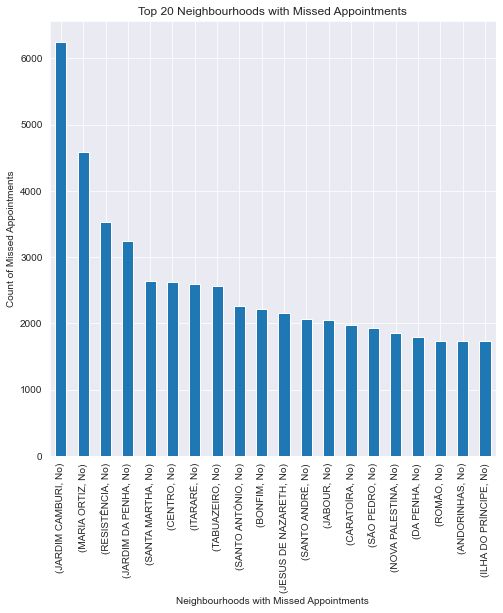

In [73]:
# Visualising the count for the top twenty neighborhoods 
top_neighbourhoods= neighbourhood.head(20)
top_neighbourhoods.plot(kind = "bar", title = "Top 20 Neighbourhoods with Missed Appointments", figsize = (8, 8),\
                        xlabel= "Neighbourhoods with Missed Appointments", ylabel = "Count of Missed Appointments");


The residence of the patients appears to be a very strong factor influencing their likelihood to show up for appointments. Residents of Jardim Camburi, Maria Ortiz, Resistencia and Jardim de Penha are most likely to miss their appointments.      

### Research Question 2: Do the number of disabilities of a handicapped patient increase their likelihood to miss appointments?

In [59]:
# Visualising the frequency of met and unmet appointments depending on handicap(s)
handicap = df.groupby("Handicap")["No-show"].value_counts()
handicap

Handicap  No-show
0         No         86374
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: No-show, dtype: int64

The number of patients with multiple disabilities is minimal compared to those with one or none. So, the proportions of only patients with disabilities may be a better way to visualise this difference.



In [60]:
#Examining the proportions for accuracy

h_one = handicap[1]["Yes"]/handicap[1].sum()
h_two = handicap[2]["Yes"]/handicap[2].sum()
h_three = handicap[3]["Yes"]/handicap[3].sum()
h_four = handicap[4]["Yes"]/handicap[4].sum()

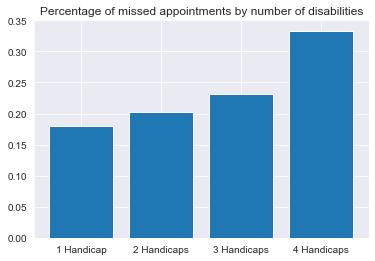

In [61]:
plt.bar([1, 2, 3, 4], [h_one, h_two, h_three, h_four])
plt.xticks([1, 2, 3, 4], ["1 Handicap", "2 Handicaps", "3 Handicaps", "4 Handicaps"])
plt.title("Percentage of missed appointments by number of disabilities");

The proportions show that the likelihood of missing a doctor's appointment increases with the number of diabilities.

### Research Question 3: Does an SMS reminder increase the likelihood of a patient to show up for their appointments?

In [62]:
# Grouping the count of met and unmet appointments by SMS reminders
SMS = df.groupby("SMS_received")["No-show"].value_counts()
SMS

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [63]:
received = SMS[1]["Yes"]/SMS[1].sum()
not_received = SMS[0]["Yes"]/SMS[0].sum()

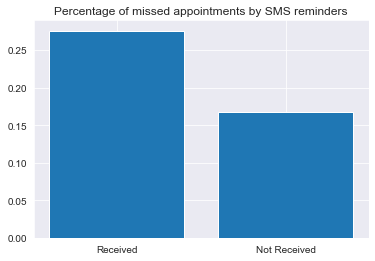

In [64]:
plt.bar([1, 2], [received, not_received])
plt.xticks([1, 2], ["Received", "Not Received"])
plt.title("Percentage of missed appointments by SMS reminders");

SMS reminders appear to not be very effective in increasing the likelihood of patients to meet their doctors' appointments.

### Research Question 4: How likely is a hypertensive and diabetic patient to miss a doctor's appointment?
> If hypertensive patients are slightly more likely to miss their appointments while diabetic patientsv have a likelihood that's roughly the same as none-diabetic ones, what is the distribution for hypertensive **and** diabetic patients?

In [65]:
# Creating a dataframe of patients with hypertension and diabetes
hd = df.query("Hypertension == 1 & Diabetes == 1")

# Viewing the dataframe
hd.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_Range
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,51 to 60
36,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,61 to 70
37,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No,61 to 70
44,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,81 to 90
47,F,2016-04-28 08:51:26+00:00,2016-04-29 00:00:00+00:00,39,MARUÍPE,0,1,1,0,0,0,No,41 to 50


In [66]:
hd_groups = hd.groupby(["Hypertension", "Diabetes"])["No-show"].value_counts()

In [67]:
hd_missed = hd_groups[1][1]["Yes"]/hd_groups[1][1].sum()
hd_not_missed = hd_groups[1][1]["No"]/hd_groups[1][1].sum()

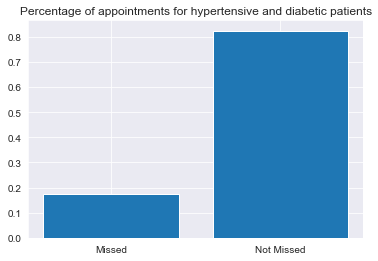

In [68]:
# Visualising the proportions

plt.bar([1, 2], [hd_missed, hd_not_missed])
plt.xticks([1, 2], ["Missed", "Not Missed"])
plt.title("Percentage of appointments for hypertensive and diabetic patients");

The plot shows that patients with hypertension and diabetes are highly unlikely to miss their appointments!

<a id='conclusions'></a>
## Conclusions

My analysis sought to find the features that increase the likelihood of patients who miss their medical appointments, the effect of multiple disabilities on the proportion of handicapped patients who meet their appointments, and the effectiveness of efforts such as SMS reminders and the Bolsa Familia social welfare coverage in increasing the proportion of patients who meet their medical appointments.

Through the sectioned analyses made in this report, the data points to these conclusions:
1. Patients appear more likely to show up for their doctor's appointments as they grow older, until they reach the age of 100.
2. Hypertensive patients are more likely to show up for their appointments than diabetic ones. However, those with both hypertension and diabetes are highly unlikely to miss a doctor's appointment.
3. There is a strong correlation between the residence of patients and the frequency of unmet appointments. With data on the neighbourhoods, this correlation can be explored further.
4. Provisions such as social welfare healthcare scholarships and SMS reminders do not have any significant effect on the likelihood of patients to show up for their appointments.
5. Disabled patients with multiple handicaps are less likely to show up for appointments with increasing number of diabilities.
6. Alcoholism and Gender do not have any significant effect on the likelihood of patients to show up for their appointments.


### Limitations

1. The Scheduled_Day column only contained data on the potential appointment day without times. I intended to ecplore the data to find the most unlikely times for patients to show up for appointments, but I couldn't do that due to the missing data.

2. There was no data available on the neighbourhoods to explore the reasons behind the high frequency of missed appointments by patients from those areas.
